<img src =  'https://camo.githubusercontent.com/7fa5735ef58c4e7b88d448f595d089c93f9bee00/68747470733a2f2f7777772e696e736169642e636f2f77702d636f6e74656e742f75706c6f6164732f323031392f30392f6c6f676f32782e706e67' />

# Human Activity Recognition using Smartphones - DataSet

### Presented by: *Vishweshwar Satpute*

# Table of Content

1. [Description of the Dataset](#section1)<br>
2. [Problem Statement](#section2)<br>
3. [Installing & Importing Libraries](#section3)<br>
4. [EDA](#section4)<br>
5. [Dummification](#section5)<br>
6. [Preparing x and y](#section6)<br>
7. [ Modelling](#section7)<br>
    7.1 [Logistic Regression](#section701)<br>
    7.2 [Decision Tree Classifier](#section702)<br>
    7.3 [Random Forest](#section703)<br>
    7.4 [KNN](#section704)<br>
    7.5 [SVM](#section705)<br>
    7.6 [Naive Bayes](#section706)<br>
8. [Conclusion](#section8)<br>

<a id=section1></a>
## 1. Description of the Dataset
Abstract: Human Activity Recognition database built from the recordings of 30 subjects performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors.

Data Set Information:

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. 

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.


1. WALKING
2. WALKING_UPSTAIRS
3. WALKING_DOWNSTAIRS
<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQIf_pNR2MxStZNcn19QTHIvF_kjd_eyyJZNfeqaoXAn4jxoklO&usqp=CAU'/>
4. SITTING 
5. STANDING
6. LAYING



<a id=section2></a>
## 2. Problem Statement

To Predict Human Activity using ML algorithm.

<a id=section3></a>
## 3. Installing & Importing Libraries

In [1]:
import numpy as np                                                
import pandas as pd 
from IPython.display import display

import seaborn as sns                                              
sns.set()
import matplotlib.pyplot as plt
plt.style.use('bmh') # for better plots
%matplotlib inline

from subprocess import check_output
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/Human_activity_recognition.csv")
data

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.01960,-0.1100,-0.9970,-0.9670,-0.983,-0.997,-0.9660,...,0.1460,-0.2170,-0.5640,-0.2130,-0.2310,0.0146,-0.1900,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.01270,-0.1030,-0.9950,-0.9730,-0.985,-0.996,-0.9740,...,0.1210,0.3490,0.0577,0.0807,0.5960,-0.4760,0.1160,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.01470,-0.1070,-0.9990,-0.9910,-0.993,-0.999,-0.9910,...,0.7400,-0.5640,-0.7660,0.1060,-0.0903,-0.1320,0.4990,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.02710,-0.0617,-0.9890,-0.8170,-0.902,-0.989,-0.7940,...,0.1310,0.2080,-0.0681,0.0623,-0.0587,0.0312,-0.2690,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.01700,-0.1110,-0.9980,-0.9910,-0.998,-0.998,-0.9890,...,0.6670,-0.9420,-0.9660,0.2450,0.1030,0.0661,-0.4120,-0.761,0.263,0.0296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604,10277,WALKING_UPSTAIRS,0.357,-0.04460,-0.1300,-0.3140,-0.0556,-0.173,-0.386,-0.0575,...,0.0168,-0.1630,-0.5930,-0.7110,-0.0612,-0.7060,0.0646,-0.660,0.274,0.1760
3605,10278,WALKING_UPSTAIRS,0.344,0.00479,-0.1220,-0.3200,-0.0667,-0.182,-0.380,-0.0710,...,-0.0292,0.1810,-0.2500,-0.4030,-0.7060,0.7390,0.8710,-0.653,0.278,0.1800
3606,10279,WALKING_UPSTAIRS,0.284,-0.00796,-0.1190,-0.3090,-0.0804,-0.211,-0.369,-0.0971,...,-0.1100,0.0245,-0.3930,-0.0761,-0.2390,0.9600,0.0866,-0.657,0.272,0.1830
3607,10280,WALKING_UPSTAIRS,0.207,0.02460,-0.1040,-0.3650,-0.1690,-0.216,-0.449,-0.1860,...,-0.2140,-0.3520,-0.7340,0.5350,-0.2570,0.9270,-0.0843,-0.657,0.267,0.1880


In [4]:
data.shape
data.info()
data.describe(include = 'all')

(3609, 563)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609 entries, 0 to 3608
Columns: 563 entries, rn to angle.Z.gravityMean
dtypes: float64(561), int64(1), object(1)
memory usage: 15.5+ MB


,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
count,3609.000000,3609,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,...,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000
unique,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,LAYING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5152.430590,NaN,0.274544,-0.017415,-0.109195,-0.608457,-0.506265,-0.614482,-0.634634,-0.521660,...,0.128804,-0.300815,-0.619400,0.007561,0.009484,0.029185,-0.010632,-0.496977,0.060040,-0.050202
std,2975.767839,NaN,0.063589,0.042589,0.056218,0.439157,0.501627,0.399514,0.413194,0.485282,...,0.240278,0.317963,0.308303,0.332249,0.448971,0.613615,0.490830,0.509336,0.311308,0.263935
min,7.000000,NaN,-0.521000,-1.000000,-0.926000,-1.000000,-0.999000,-1.000000,-1.000000,-0.999000,...,-0.786000,-0.968000,-0.995000,-0.969000,-0.997000,-1.000000,-0.993000,-0.999000,-1.000000,-0.971000
25%,2570.000000,NaN,0.262000,-0.025200,-0.122000,-0.992000,-0.976000,-0.979000,-0.993000,-0.976000,...,-0.015800,-0.533000,-0.836000,-0.118000,-0.281000,-0.478000,-0.398000,-0.816000,-0.015600,-0.122000
50%,5158.000000,NaN,0.277000,-0.017200,-0.109000,-0.939000,-0.812000,-0.844000,-0.946000,-0.816000,...,0.132000,-0.341000,-0.706000,0.007740,0.009830,0.029600,-0.013400,-0.716000,0.183000,-0.005260
75%,7727.000000,NaN,0.287000,-0.011000,-0.098000,-0.254000,-0.051700,-0.283000,-0.306000,-0.084500,...,0.290000,-0.118000,-0.501000,0.142000,0.309000,0.554000,0.374000,-0.522000,0.252000,0.104000


In [5]:
data[data.duplicated(keep=False)]

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean


In [6]:
print('Checking for Null Values \n{}'.format(data.isnull().sum()))

Checking for Null Values 
rn                                     0
activity                               0
tBodyAcc.mean.X                        0
tBodyAcc.mean.Y                        0
tBodyAcc.mean.Z                        0
                                      ..
angle.tBodyGyroMean.gravityMean        0
angle.tBodyGyroJerkMean.gravityMean    0
angle.X.gravityMean                    0
angle.Y.gravityMean                    0
angle.Z.gravityMean                    0
Length: 563, dtype: int64


In [7]:
print('Different types of Activities \n\n{}'.format(data.activity.unique()))

Different types of Activities 

['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


<a id=section4></a>
## 4. EDA

#### Lets look at the different types of activities wrt percentages 

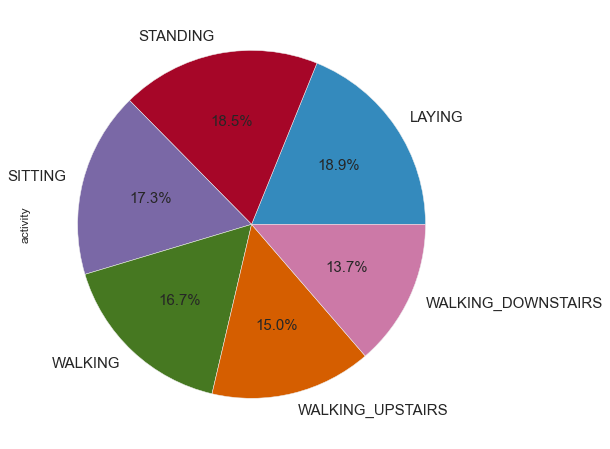

In [8]:
data['activity'].value_counts().plot(kind='pie', autopct = '%3.1f%%', fontsize = 15, figsize = (8,8))

`Here the data with 3609 rows × 563 columns with 6 different activities, we will be considering two Activity for better understanding and processing considering` ***Standing*** ```and``` ***Sitting*** ```activities on which we will be implementing the ML algorithm.```

The Activities which we have selected for Processing are: 

STANDING    668
SITTING     623
Name: activity, dtype: int64



Text(0.5, 1.0, 'Activity Count')

Text(0, 0.5, 'Count')

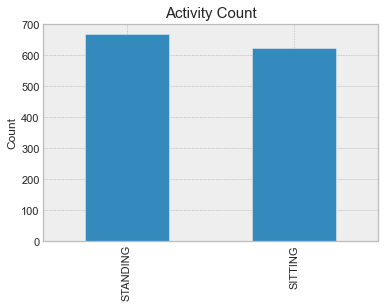

In [9]:
data = data[~data['activity'].isin(['LAYING' , 'WALKING' , 'WALKING_DOWNSTAIRS' , 'WALKING_UPSTAIRS'])]

print('The Activities which we have selected for Processing are: \n\n{}\n'.format(data.activity.value_counts()))
data.activity.value_counts().plot(kind = 'bar')
plt.title('Activity Count', fontsize = 15)
plt.ylabel('Count')

<a id=section5></a>
## 5. Dummification
#### Dummification of categorical variable

In [10]:
data = pd.get_dummies(data , drop_first = True)
data.head(5)

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean,activity_STANDING
0,7,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,-0.983,...,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430,1
1,11,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,-0.985,...,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347,1
2,14,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,-0.992,...,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351,1
3,15,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,-0.888,...,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364,1
4,20,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,-0.997,...,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296,1


<a id=section6></a>
## 6. Preparing x and y

In [11]:
x = data.drop('activity_STANDING' , axis = 1)
print("")
print("_______________________________Preparing Explanatory Variables____________________________________")
x.head(5)
x.shape


_______________________________Preparing Explanatory Variables____________________________________


,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,-0.983,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,-0.985,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,-0.992,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,-0.888,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,-0.997,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


(1291, 562)

In [12]:
y = data['activity_STANDING']
print("")
print("_______________________________Preparing Target Variables____________________________________")
y.head(5)
y.shape


_______________________________Preparing Target Variables____________________________________


0    1
1    1
2    1
3    1
4    1
Name: activity_STANDING, dtype: uint8

(1291,)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
print('Shape of X Training Data is {}\n'.format(x_train.shape))
print('Shape of X Test Data is {}\n'.format(x_test.shape))
print('Shape of Y Training Data is {}\n'.format(y_train.shape))
print('Shape of Y Test Data is {}\n'.format(y_test.shape))

Shape of X Training Data is (1032, 562)

Shape of X Test Data is (259, 562)

Shape of Y Training Data is (1032,)

Shape of Y Test Data is (259,)



<a id=section7></a>
## 7. Machine Learning Modelling

<a id=section701></a>
### 7.1 Logistic Regression

In [14]:
import time                                           
start_time = time.process_time()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("")
print("_______________________________Logistic Regression____________________________________")
print("")
log = LogisticRegression()
log.fit(x_train , y_train)
y_pred_train = log.predict(x_train)  
y_pred_test = log.predict(x_test)      
print("")
print("_______________________________Logistic Accuracy____________________________________")
print("")
Logistic_accuracy = accuracy_score(y_test, y_pred_test)*100
print('Logistic Regression Accuracy: {}%\n'.format(Logistic_accuracy))
print("")
print("_______________________________Logistic Confusion Matrix____________________________________")
print("")
Logistic_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
Logistic_confusion_matrix.index = ['Actual Standing','Actual Sitting']
Logistic_confusion_matrix.columns = ['Predicted Standing','Predicted Sitting']
print(Logistic_confusion_matrix,'\n')
print("")
print("_______________________________Logistic Classification Report____________________________________")
print("")
logistic_report = classification_report(y_test, y_pred_test)
print("The Classification Report for Logistic Regression:\n\n{}".format(logistic_report))
print("")
print("_______________________________Time Taken for Logistic Regression____________________________________")
print("")
end_time=time.process_time()
Processtime_log= end_time - start_time
print('Start Time:{}\nEnd Time:{}\nTotal Time to Complete:{}'.format(start_time,end_time,Processtime_log))
print("")
print("___________________________________________________________________")
print("")


_______________________________Logistic Regression____________________________________



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


_______________________________Logistic Accuracy____________________________________

Logistic Regression Accuracy: 91.8918918918919%


_______________________________Logistic Confusion Matrix____________________________________

                 Predicted Standing  Predicted Sitting
Actual Standing                 110                 13
Actual Sitting                    8                128 


_______________________________Logistic Classification Report____________________________________

The Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       123
           1       0.91      0.94      0.92       136

    accuracy                           0.92       259
   macro avg       0.92      0.92      0.92       259
weighted avg       0.92      0.92      0.92       259


_______________________________Time Taken for Logistic Regression____________________________________

Start Time:7.828125

<a id=section702></a>
### 7.2 Decision Tree Classifier

In [15]:
import time
start_time = time.process_time()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
print("")
print("_______________________________Decision Tree____________________________________")
print("")
DT = DecisionTreeClassifier( criterion='gini')
DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
y_pred_test = DT.predict(x_test)
print("")
print("_______________________________Decision Tree Accuracy____________________________________")
print("")
Decision_Tree_accuracy = accuracy_score(y_test, y_pred_test)*100
print('Decision Tree Accuracy: {}%\n'.format(Decision_Tree_accuracy))
print("")
print("_______________________________Decision Tree Confusion Matrix____________________________________")
print("")
Decision_Tree_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
Decision_Tree_confusion_matrix.index = ['Actual Standing','Actual Sitting']
Decision_Tree_confusion_matrix.columns = ['Predicted Standing','Predicted Sitting']
print(Decision_Tree_confusion_matrix,'\n')
print("_______________________________Decision Tree Classification Report____________________________________")
print("")
Decision_tree_report = classification_report(y_test, y_pred_test)
print("The Classification Report for Decision Tree:\n\n{}".format(Decision_tree_report))
print("")
print("_______________________________Time Taken for Decision Tree____________________________________")
print("")
end_time=time.process_time()
Processtime_DT= end_time - start_time
print('Start Time:{}\nEnd Time:{}\nTotal Time to Complete:{}'.format(start_time,end_time,Processtime_DT))
print("")
print("___________________________________________________________________")
print("")


_______________________________Decision Tree____________________________________



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


_______________________________Decision Tree Accuracy____________________________________

Decision Tree Accuracy: 87.25868725868726%


_______________________________Decision Tree Confusion Matrix____________________________________

                 Predicted Standing  Predicted Sitting
Actual Standing                 108                 15
Actual Sitting                   18                118 

_______________________________Decision Tree Classification Report____________________________________

The Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       123
           1       0.89      0.87      0.88       136

    accuracy                           0.87       259
   macro avg       0.87      0.87      0.87       259
weighted avg       0.87      0.87      0.87       259


_______________________________Time Taken for Decision Tree____________________________________

Start Time:8.453125
En

<a id=section703></a>
### 7.3 Random Forest

In [16]:
import time
start_time = time.process_time()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
print("")
print("_______________________________Random Forest Classifier____________________________________")
print("")
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
y_pred_train = RFC.predict(x_train)
y_pred_test = RFC.predict(x_test)
print("")
print("_______________________________Random Forest Classifier Accuracy____________________________________")
print("")
Random_Forest_Classifier_accuracy = accuracy_score(y_test, y_pred_test)*100
print('Random Forest Classifier Accuracy: {}%\n'.format(Random_Forest_Classifier_accuracy))
print("")
print("_______________________________Random Forest Classifier Confusion Matrix____________________________________")
print("")
Random_Forest_Classifier_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
Random_Forest_Classifier_confusion_matrix.index = ['Actual Standing','Actual Sitting']
Random_Forest_Classifier_confusion_matrix.columns = ['Predicted Standing','Predicted Sitting']
print(Random_Forest_Classifier_confusion_matrix,'\n')
print("_______________________________Random Forest Classifier Classification Report____________________________________")
print("")
Random_Forest_Classifier = classification_report(y_test, y_pred_test)
print("The Classification Report for Random Forest Classifier:\n\n{}".format(Random_Forest_Classifier))
print("")
print("_______________________________Time Taken for Random Forest Classifier_____________________________________")
print("")
end_time=time.process_time()
Processtime_RFC= end_time - start_time
print('Start Time:{}\nEnd Time:{}\nTotal Time to Complete:{}'.format(start_time,end_time,Processtime_RFC))
print("")
print("___________________________________________________________________")
print("")


_______________________________Random Forest Classifier____________________________________



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


_______________________________Random Forest Classifier Accuracy____________________________________

Random Forest Classifier Accuracy: 96.52509652509652%


_______________________________Random Forest Classifier Confusion Matrix____________________________________

                 Predicted Standing  Predicted Sitting
Actual Standing                 120                  3
Actual Sitting                    6                130 

_______________________________Random Forest Classifier Classification Report____________________________________

The Classification Report for Random Forest Classifier:

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       123
           1       0.98      0.96      0.97       136

    accuracy                           0.97       259
   macro avg       0.96      0.97      0.97       259
weighted avg       0.97      0.97      0.97       259


_______________________________Time Taken for Random Forest Clas

<a id=section704></a>
### 7.4 KNN

In [17]:
import time
start_time = time.process_time()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
print("")
print("_______________________________KNeighborsClassifier____________________________________")
print("")
KNN = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', 
                           algorithm = 'auto', leaf_size = 30, p = 2, metric = 'minkowski', n_jobs = None)
KNN.fit(x_train, y_train)
y_pred_train = KNN.predict(x_train)
y_pred_test = KNN.predict(x_test)
print("")
print("_______________________________KNeighbors Classifier Accuracy____________________________________")
print("")
KNN_accuracy = accuracy_score(y_test, y_pred_test)*100
print('KNeighbors Classifier Accuracy: {}%\n'.format(KNN_accuracy))
print("")
print("_______________________________KNeighbors Classifier Confusion Matrix____________________________________")
print("")
KNN_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
KNN_confusion_matrix.index = ['Actual Standing','Actual Sitting']
KNN_confusion_matrix.columns = ['Predicted Standing','Predicted Sitting']
print(KNN_confusion_matrix,'\n')
print("_______________________________KNeighbors Classifier Classification Report____________________________________")
print("")
KNN_report = classification_report(y_test, y_pred_test)
print("The Classification Report for KNeighbors Classifier:\n\n{}".format(KNN_report))
print("")
print("_______________________________Time Taken for KNeighbors Classifier____________________________________")
print("")
end_time=time.process_time()
Processtime_KNN= end_time - start_time
print('Start Time:{}\nEnd Time:{}\nTotal Time to Complete:{}'.format(start_time,end_time,Processtime_KNN))
print("")
print("___________________________________________________________________")
print("")


_______________________________KNeighborsClassifier____________________________________



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


_______________________________KNeighbors Classifier Accuracy____________________________________

KNeighbors Classifier Accuracy: 92.66409266409266%


_______________________________KNeighbors Classifier Confusion Matrix____________________________________

                 Predicted Standing  Predicted Sitting
Actual Standing                 118                  5
Actual Sitting                   14                122 

_______________________________KNeighbors Classifier Classification Report____________________________________

The Classification Report for KNeighbors Classifier:

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       123
           1       0.96      0.90      0.93       136

    accuracy                           0.93       259
   macro avg       0.93      0.93      0.93       259
weighted avg       0.93      0.93      0.93       259


_______________________________Time Taken for KNeighbors Classifier____________

<a id=section705></a>
### 7.5 SVM

In [18]:
import time
start_time = time.process_time()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
print("")
print("_______________________________SVM____________________________________")
print("")
SVM = svm.SVC(kernel="linear")

SVM.fit(x_train, y_train)
y_pred_train = SVM.predict(x_train)
y_pred_test = SVM.predict(x_test)
print("")
print("_______________________________SVM Accuracy____________________________________")
print("")
SVM_accuracy = accuracy_score(y_test, y_pred_test)*100
print('SVM Accuracy: {}%\n'.format(SVM_accuracy))
print("")
print("_______________________________SVM Confusion Matrix____________________________________")
print("")
SVM_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
SVM_confusion_matrix.index = ['Actual Standing','Actual Sitting']
SVM_confusion_matrix.columns = ['Predicted Standing','Predicted Sitting']
print(SVM_confusion_matrix,'\n')
print("_______________________________SVM Classification Report____________________________________")
print("")
SVM_report = classification_report(y_test, y_pred_test)
print("The Classification Report for SVM:\n\n{}".format(SVM_report))
print("")
print("_______________________________Time Taken for SVM____________________________________")
print("")
end_time=time.process_time()
Processtime_SVM= end_time - start_time
print('Start Time:{}\nEnd Time:{}\nTotal Time to Complete:{}'.format(start_time,end_time,Processtime_SVM))
print("")
print("___________________________________________________________________")
print("")


_______________________________SVM____________________________________



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


_______________________________SVM Accuracy____________________________________

SVM Accuracy: 91.11969111969111%


_______________________________SVM Confusion Matrix____________________________________

                 Predicted Standing  Predicted Sitting
Actual Standing                 111                 12
Actual Sitting                   11                125 

_______________________________SVM Classification Report____________________________________

The Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       123
           1       0.91      0.92      0.92       136

    accuracy                           0.91       259
   macro avg       0.91      0.91      0.91       259
weighted avg       0.91      0.91      0.91       259


_______________________________Time Taken for SVM____________________________________

Start Time:11.296875
End Time:232.8125
Total Time to Complete:221.515625

________

<a id=section706></a>
### 7.6 Naive Bayes

In [19]:
import time
start_time = time.process_time()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
print("")
print("_______________________________Naive Bayes____________________________________")
print("")
Naive_Bayes = GaussianNB()

Naive_Bayes.fit(x_train, y_train)
y_pred_train = Naive_Bayes.predict(x_train)
y_pred_test = Naive_Bayes.predict(x_test)
print("")
print("_______________________________Naive Bayes Accuracy____________________________________")
print("")
Naive_Bayes_accuracy = accuracy_score(y_test, y_pred_test)*100
print('Naive_Bayes Accuracy: {}%\n'.format(Naive_Bayes_accuracy))
print("")
print("_______________________________Naive Bayes Confusion Matrix____________________________________")
print("")
Naive_Bayes_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
Naive_Bayes_confusion_matrix.index = ['Actual Standing','Actual Sitting']
Naive_Bayes_confusion_matrix.columns = ['Predicted Standing','Predicted Sitting']
print(Naive_Bayes_confusion_matrix,'\n')
print("_______________________________Naive Bayes Classification Report____________________________________")
print("")
Naive_Bayes_report = classification_report(y_test, y_pred_test)
print("The Classification Report for Naive_Bayes:\n\n{}".format(Naive_Bayes_report))
print("")
print("_______________________________Time Taken for Naive Bayes____________________________________")
print("")
end_time=time.process_time()
Processtime_Naive_Bayes = end_time - start_time
print('Start Time:{}\nEnd Time:{}\nTotal Time to Complete:{}'.format(start_time,end_time,Processtime_Naive_Bayes))
print("")
print("___________________________________________________________________")
print("")


_______________________________Naive Bayes____________________________________



GaussianNB(priors=None, var_smoothing=1e-09)


_______________________________Naive Bayes Accuracy____________________________________

Naive_Bayes Accuracy: 76.44787644787645%


_______________________________Naive Bayes Confusion Matrix____________________________________

                 Predicted Standing  Predicted Sitting
Actual Standing                  63                 60
Actual Sitting                    1                135 

_______________________________Naive Bayes Classification Report____________________________________

The Classification Report for Naive_Bayes:

              precision    recall  f1-score   support

           0       0.98      0.51      0.67       123
           1       0.69      0.99      0.82       136

    accuracy                           0.76       259
   macro avg       0.84      0.75      0.74       259
weighted avg       0.83      0.76      0.75       259


_______________________________Time Taken for Naive Bayes____________________________________

Start Time:232.828125
End Time:232

<a id=section8></a>
## 8. Conclusion

In [20]:
Accuracy = pd.DataFrame([Logistic_accuracy, Decision_Tree_accuracy, Random_Forest_Classifier_accuracy, KNN_accuracy, SVM_accuracy, Naive_Bayes_accuracy])
Processing_Time = pd.DataFrame([Processtime_log, Processtime_DT, Processtime_RFC, Processtime_KNN, Processtime_SVM, Processtime_Naive_Bayes])
Summary = pd.concat([Accuracy , Processing_Time],axis=1)
Summary.columns = ['Accuracy' , 'Process Time in Sec']
Summary.index = ['Logistic Regression','Decision Tree Classifier','Random Forest', 'KNN', 'SVM', 'Naive Bayes']
Summary = Summary.sort_values(by= 'Accuracy', ascending=False)

In [21]:
cm= sns.light_palette("green", as_cmap=True)
Summary.style.background_gradient(cmap=cm)

,Accuracy,Process Time in Sec
Random Forest,96.525097,1.531250
KNN,92.664093,0.562500
Logistic Regression,91.891892,0.578125
SVM,91.119691,221.515625
Decision Tree Classifier,87.258687,0.671875
Naive Bayes,76.447876,0.093750


In [32]:
print('Lets see how the Accuracy and the Process Time of different ML Algorithm perform in Test(1,2,3)')

Lets see how the Accuracy and the Process Time of different ML Algorithm perform in Test(1,2,3)


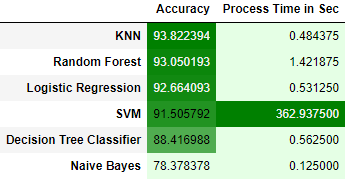
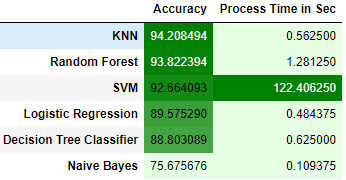
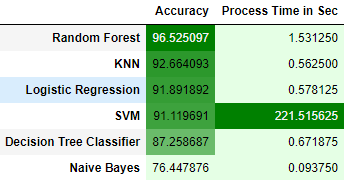

### **Conclusion**

1. We have compared the performance of the above ML Algorithm using various model evaluation techinques.

2. As illustrated in the above reports we can graw that the KNN and Random Forest both report marginaly different with KNN to be slightly higher Accuracy with optimal Processing Time.


